### PCA Spectf Dataset

## Table of Contents

1. [Data Description](#dd)
2. [Importing the packages and dataset](#import) 
3. [Exploratory Data Analysis](#eda)
4. [Splitting labels and features](#split)
5. [Normalizing the input columns](#normalize)
6. [Logistic Regression](#lr)
7. [Applying PCA to Logistic Regression model](#pcalr)
8. [Random Forest](#rf)
9. [Applying PCA to Random Forest model](#pcarf)

### 1. Data Description  <a id='dd'>

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.
   
   1.   OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
   2.   F1R:   continuous (count in ROI (region of interest) 1 in rest)
   3.   F1S:   continuous (count in ROI 1 in stress)
   4.   F2R:   continuous (count in ROI 2 in rest)
   5.   F2S:   continuous (count in ROI 2 in stress)
   6.   F3R:   continuous (count in ROI 3 in rest)
   7.   F3S:   continuous (count in ROI 3 in stress)
   8.   F4R:   continuous (count in ROI 4 in rest)
   9.   F4S:   continuous (count in ROI 4 in stress)
   10.  F5R:   continuous (count in ROI 5 in rest)
   11.  F5S:   continuous (count in ROI 5 in stress)
   12.  F6R:   continuous (count in ROI 6 in rest)
   13.  F6S:   continuous (count in ROI 6 in stress)
   14.  F7R:   continuous (count in ROI 7 in rest)
   15.  F7S:   continuous (count in ROI 7 in stress)
   16.  F8R:   continuous (count in ROI 8 in rest)
   17.  F8S:   continuous (count in ROI 8 in stress)
   18.  F9R:   continuous (count in ROI 9 in rest)
   19.  F9S:   continuous (count in ROI 9 in stress)
   20.  F10R:  continuous (count in ROI 10 in rest)
   21.  F10S:  continuous (count in ROI 10 in stress)
   22.  F11R:  continuous (count in ROI 11 in rest)
   23.  F11S:  continuous (count in ROI 11 in stress)
   24.  F12R:  continuous (count in ROI 12 in rest)
   25.  F12S:  continuous (count in ROI 12 in stress)
   26.  F13R:  continuous (count in ROI 13 in rest)
   27.  F13S:  continuous (count in ROI 13 in stress)
   28.  F14R:  continuous (count in ROI 14 in rest)
   29.  F14S:  continuous (count in ROI 14 in stress)
   30.  F15R:  continuous (count in ROI 15 in rest)
   31.  F15S:  continuous (count in ROI 15 in stress)
   32.  F16R:  continuous (count in ROI 16 in rest)
   33.  F16S:  continuous (count in ROI 16 in stress)
   34.  F17R:  continuous (count in ROI 17 in rest)
   35.  F17S:  continuous (count in ROI 17 in stress)
   36.  F18R:  continuous (count in ROI 18 in rest)
   37.  F18S:  continuous (count in ROI 18 in stress)
   38.  F19R:  continuous (count in ROI 19 in rest)
   39.  F19S:  continuous (count in ROI 19 in stress)
   40.  F20R:  continuous (count in ROI 20 in rest)
   41.  F20S:  continuous (count in ROI 20 in stress)
   42.  F21R:  continuous (count in ROI 21 in rest)
   43.  F21S:  continuous (count in ROI 21 in stress)
   44.  F22R:  continuous (count in ROI 22 in rest)
   45.  F22S:  continuous (count in ROI 22 in stress)
   
   ** Objective **
   
   Our goal is to predict whether the SPECT images are normal or not.

## 2. Importing the packages and dataset <a id='import'>

In [67]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

%matplotlib inline
plt.style.use('fivethirtyeight')

In [68]:
# Loading the train data

url = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_df= pd.read_table(url,sep=',',names=col_names)

In [69]:
spectf_df.shape

(187, 45)

In [70]:
# Loading the Test data

url = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_test= pd.read_table(url,sep=',',names=col_names)

In [71]:
spectf_test.shape

(80, 45)

So the training data has 187 records and the test data has 80 records.

In [72]:
spectf_df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [73]:
spectf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  187 non-null    int64
 1   F1R     187 non-null    int64
 2   F1S     187 non-null    int64
 3   F2R     187 non-null    int64
 4   F2S     187 non-null    int64
 5   F3R     187 non-null    int64
 6   F3S     187 non-null    int64
 7   F4R     187 non-null    int64
 8   F4S     187 non-null    int64
 9   F5R     187 non-null    int64
 10  F5S     187 non-null    int64
 11  F6R     187 non-null    int64
 12  F6S     187 non-null    int64
 13  F7R     187 non-null    int64
 14  F7S     187 non-null    int64
 15  F8R     187 non-null    int64
 16  F8S     187 non-null    int64
 17  F9R     187 non-null    int64
 18  F9S     187 non-null    int64
 19  F10R    187 non-null    int64
 20  F10S    187 non-null    int64
 21  F11R    187 non-null    int64
 22  F11S    187 non-null    int64
 23  F12R    187 non

In [74]:
spectf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  80 non-null     int64
 1   F1R     80 non-null     int64
 2   F1S     80 non-null     int64
 3   F2R     80 non-null     int64
 4   F2S     80 non-null     int64
 5   F3R     80 non-null     int64
 6   F3S     80 non-null     int64
 7   F4R     80 non-null     int64
 8   F4S     80 non-null     int64
 9   F5R     80 non-null     int64
 10  F5S     80 non-null     int64
 11  F6R     80 non-null     int64
 12  F6S     80 non-null     int64
 13  F7R     80 non-null     int64
 14  F7S     80 non-null     int64
 15  F8R     80 non-null     int64
 16  F8S     80 non-null     int64
 17  F9R     80 non-null     int64
 18  F9S     80 non-null     int64
 19  F10R    80 non-null     int64
 20  F10S    80 non-null     int64
 21  F11R    80 non-null     int64
 22  F11S    80 non-null     int64
 23  F12R    80 non-nu

In [75]:
spectf_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


Difference in the standard deviation determines that the data is not in the same scale. So We need to normalise it.

### 3. Exploratory Data Analysis <a id = 'eda'>

In [29]:
import pandas_profiling
report = pandas_profiling.ProfileReport(spectf_df)
report.to_file('spectf_train.html')

In [30]:
report = pandas_profiling.ProfileReport(spectf_test)
report.to_file('spectf_test.html')

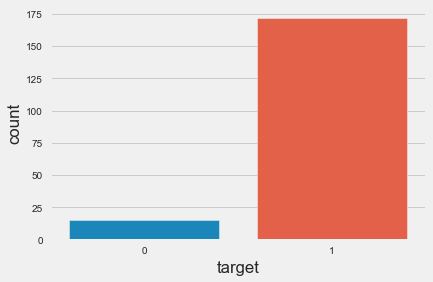

In [76]:
sns.countplot(x='target', data = spectf_df)

The training data is highly imbalanced.

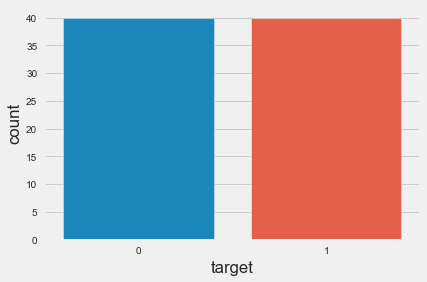

In [77]:
sns.countplot(x='target', data = spectf_test)

The test data is balanced.

Text(0.5, 1.0, 'Correlation between different features')

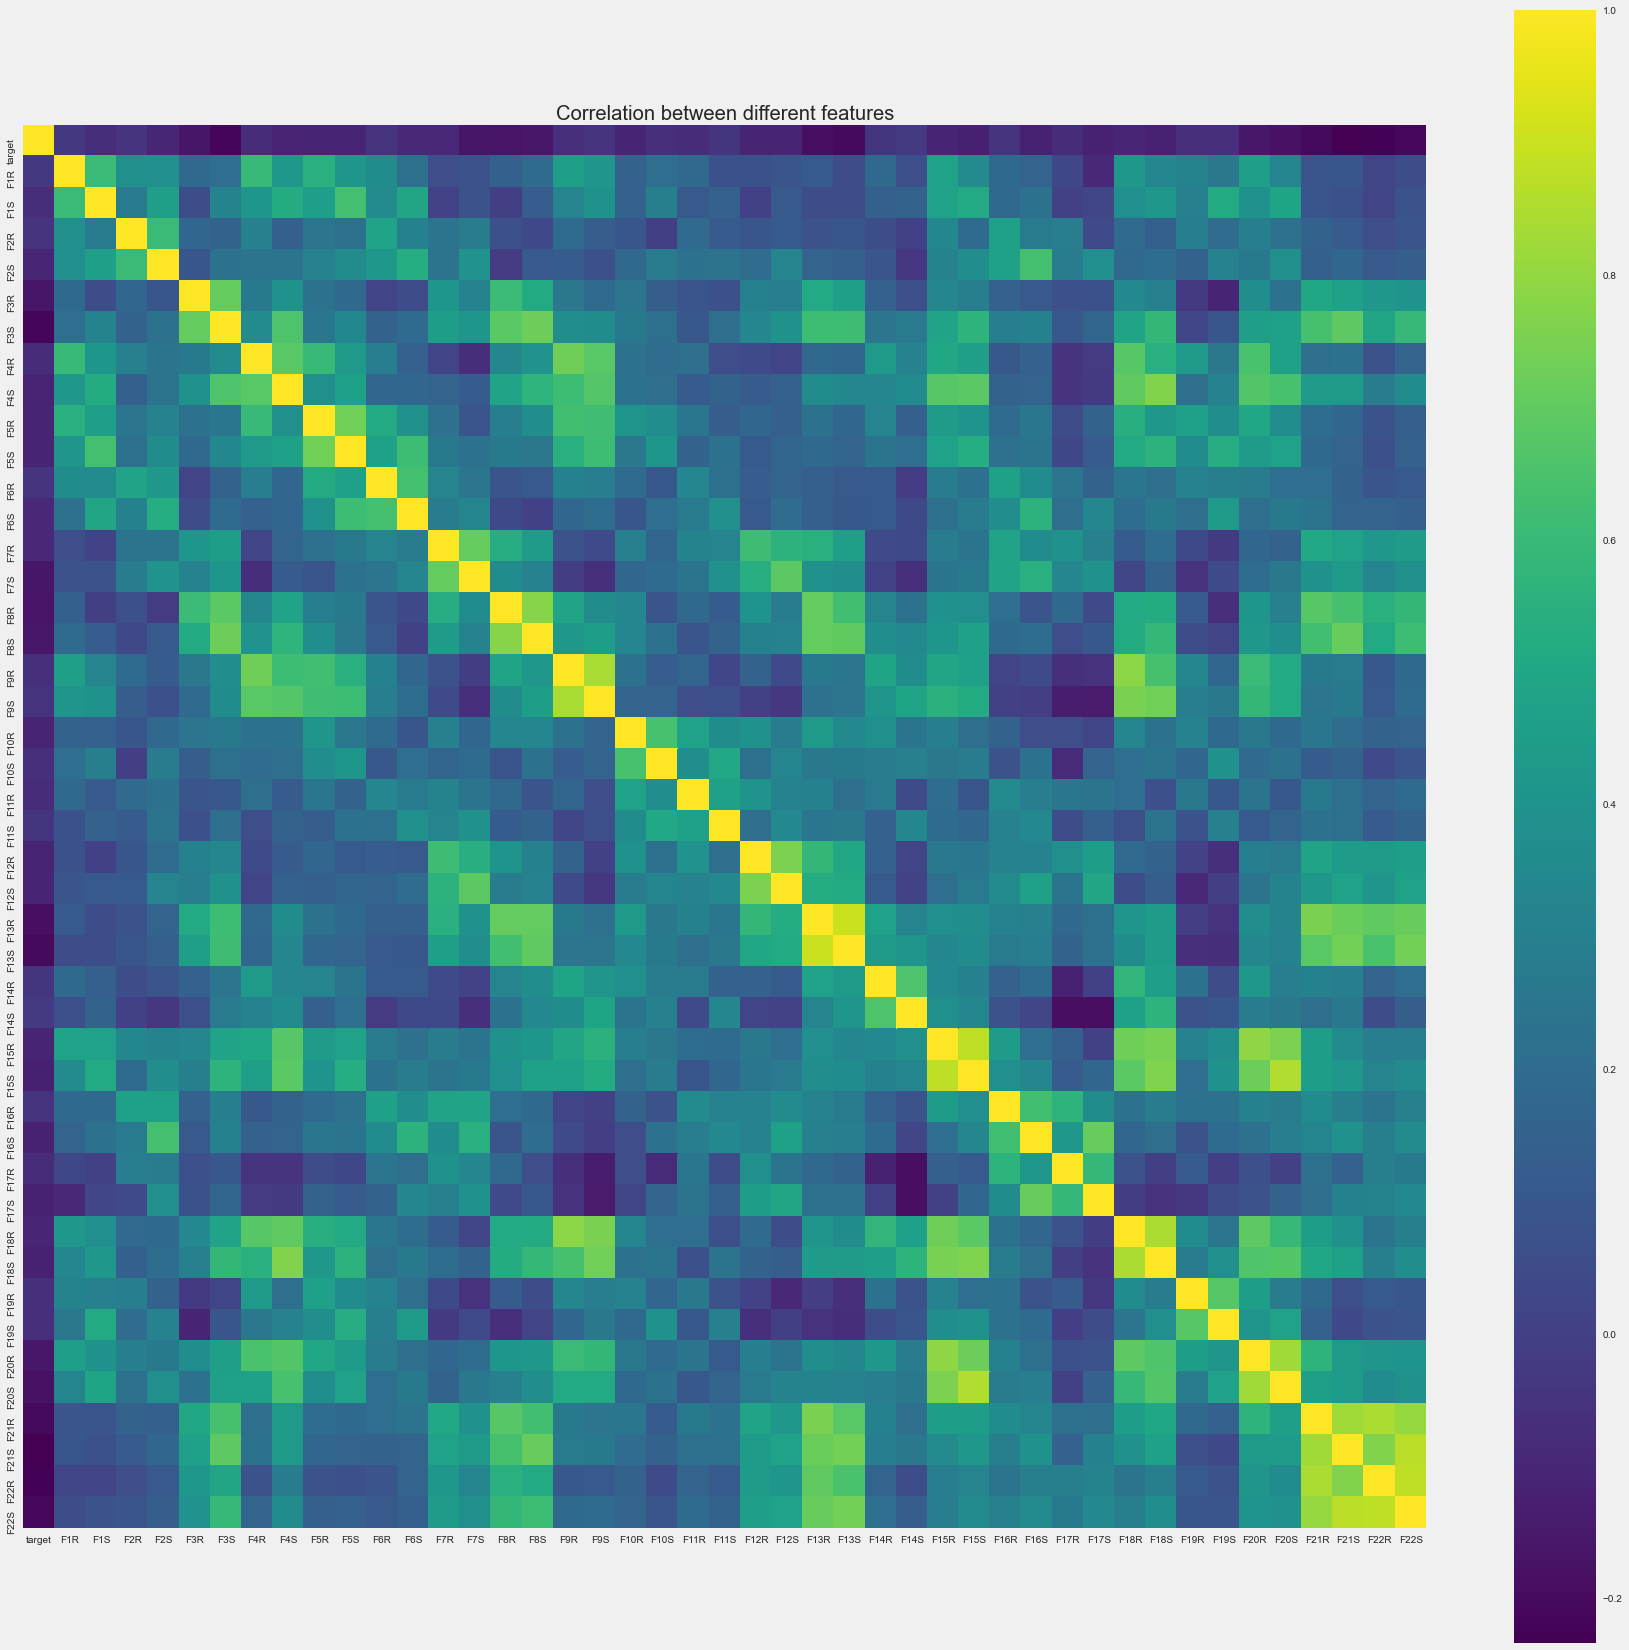

In [78]:
# Check the correlation between the variables.

correlation  = spectf_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square = True, cmap = 'viridis')
plt.title('Correlation between different features')

In [79]:
correlation

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.000000,-0.033205,-0.072310,-0.047347,-0.100783,-0.162407,-0.218370,-0.084463,-0.117129,-0.109763,...,-0.103840,-0.122409,-0.060936,-0.069405,-0.158235,-0.180498,-0.201578,-0.233921,-0.224858,-0.213390
F1R,-0.033205,1.000000,0.601643,0.380365,0.376806,0.184712,0.208528,0.599774,0.424983,0.549938,...,0.422417,0.330402,0.317041,0.255071,0.451074,0.327409,0.089097,0.097360,0.021205,0.050646
F1S,-0.072310,0.601643,1.000000,0.271874,0.455517,0.055241,0.317336,0.415818,0.519327,0.455041,...,0.377079,0.418680,0.299668,0.517828,0.396013,0.488027,0.088510,0.073545,0.016101,0.083307
F2R,-0.047347,0.380365,0.271874,1.000000,0.601705,0.166304,0.149028,0.300404,0.141069,0.246003,...,0.188291,0.139054,0.287469,0.195695,0.288137,0.223436,0.147974,0.116902,0.057365,0.084343
F2S,-0.100783,0.376806,0.455517,0.601705,1.000000,0.094517,0.226083,0.239487,0.233756,0.310953,...,0.178453,0.202181,0.155147,0.309793,0.263244,0.379087,0.137220,0.169305,0.103953,0.129407
F3R,-0.162407,0.184712,0.055241,0.166304,0.094517,1.000000,0.710749,0.262919,0.394523,0.231966,...,0.349090,0.299781,-0.022380,-0.110333,0.367660,0.225666,0.503053,0.464465,0.421015,0.398157
F3S,-0.218370,0.208528,0.317336,0.149028,0.226083,0.710749,1.000000,0.350626,0.656415,0.251063,...,0.483734,0.581697,0.020715,0.096611,0.455714,0.473037,0.638465,0.695800,0.491006,0.594700
F4R,-0.084463,0.599774,0.415818,0.300404,0.239487,0.262919,0.350626,1.000000,0.679731,0.595992,...,0.676583,0.551457,0.428249,0.254531,0.644387,0.468698,0.213282,0.228189,0.079135,0.160490
F4S,-0.117129,0.424983,0.519327,0.141069,0.233756,0.394523,0.656415,0.679731,1.000000,0.379337,...,0.701032,0.764119,0.210451,0.310271,0.663214,0.641950,0.429595,0.433020,0.277691,0.354779
F5R,-0.109763,0.549938,0.455041,0.246003,0.310953,0.231966,0.251063,0.595992,0.379337,1.000000,...,0.544854,0.423605,0.462315,0.368660,0.501115,0.367761,0.201297,0.167055,0.082002,0.133144


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022303971978>,
      dtype=object)

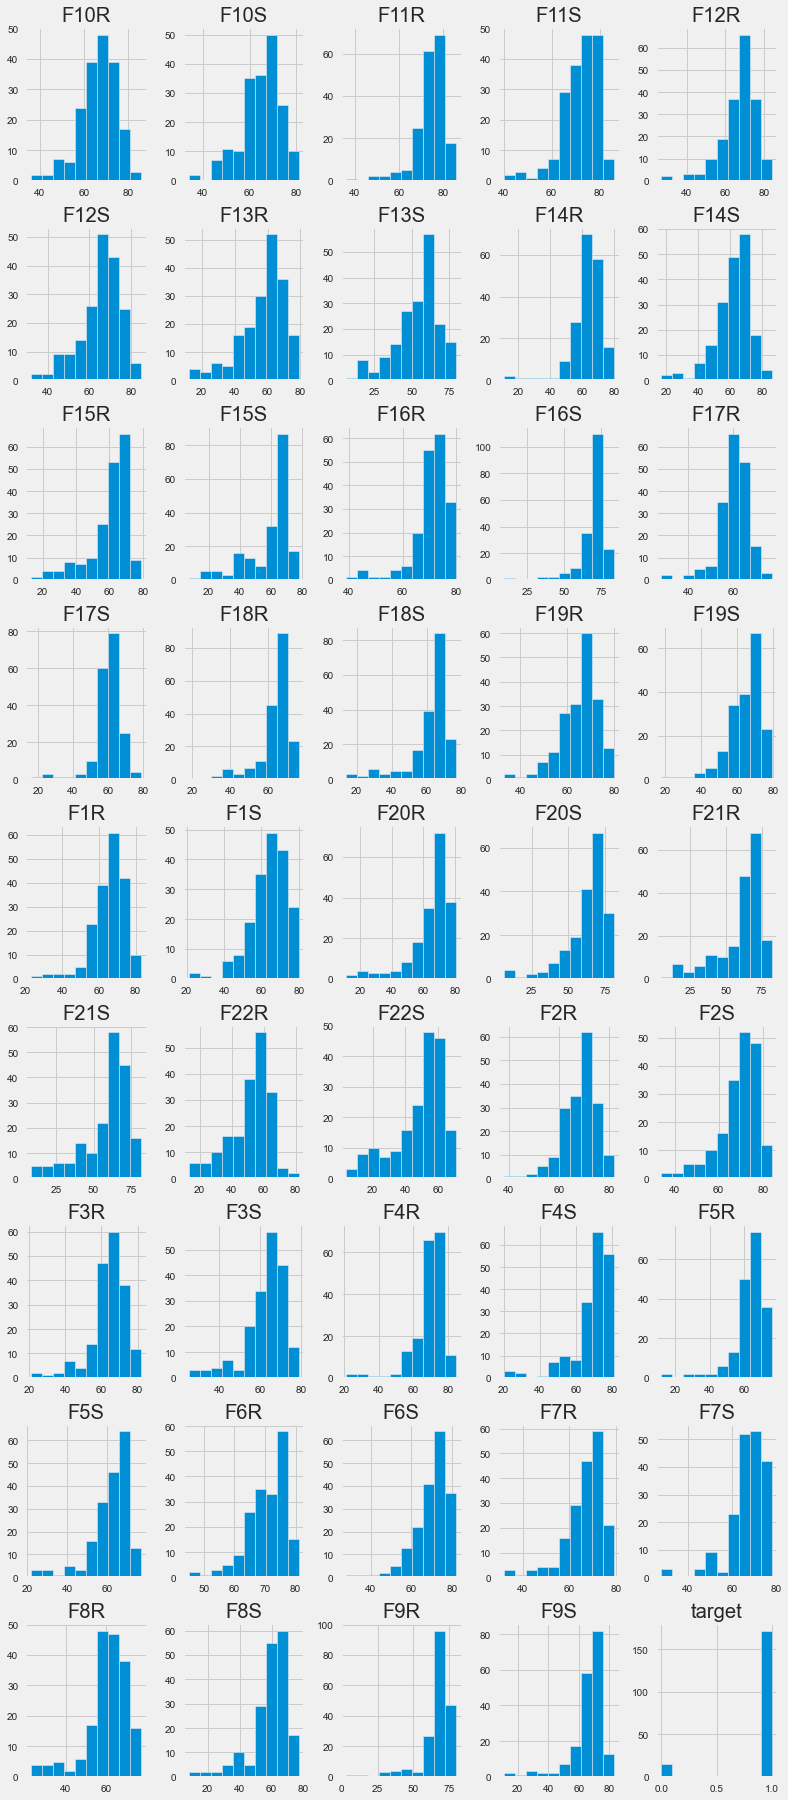

In [80]:
spectf_df.hist(bins=10, figsize=(12,30), layout=(9,5))

A lot of histogram has same range and follows normal distribution.

### 4. Splitting labels and features   <a id='split'>

In [81]:
target = spectf_df['target']
spectf_df.drop('target', axis = 1, inplace = True)

In [82]:
spectf_df.shape

(187, 44)

In [83]:
target_t = spectf_test['target']
spectf_test.drop('target', axis=1, inplace=True)

In [84]:
spectf_test.shape

(80, 44)

In [85]:
target_t.value_counts()

1    40
0    40
Name: target, dtype: int64

### 5. Normalizing the input columns   <a id='normalize'>
Most of the distribution of columns follow normal distribution. Hence we can scale them using Standard Scaler to preprocess the data.

Standard Scaler standardize features by removing the mean and scaling to unit variance.<br>
Each value is reduced using the following formula
$$ z = \frac {x - \mu}{\sigma}  $$
Where x is the value,  <br>
$\mu$ is the mean of that columns,  <br>
$\sigma$ is the standard deviation of that columns.

In [156]:
#Scaling the train and test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
spect_df = scaler.fit_transform(spectf_df)
#spect_test = scaler.fit_transform(spectf_test)
spect_test = scaler.transform(spectf_test)

In [157]:
spect_df

array([[ 0.20940529,  0.41596002,  0.68734602, ...,  0.96547463,
         0.59118869,  1.28968911],
       [ 1.10446332,  1.00822796,  0.39455854, ..., -0.02516326,
         0.44098178,  0.22637971],
       [ 1.99952135,  0.02111472, -0.33741018, ...,  0.34632595,
        -0.61046658, -0.43818867],
       ...,
       [ 1.10446332,  0.90951664,  0.54095228, ...,  1.0273895 ,
         1.19201632,  1.48905963],
       [-0.68565274, -0.17630793,  0.54095228, ...,  1.08930437,
         1.41732668,  1.42260279],
       [-0.12624147,  0.21853737, -0.04462269, ...,  0.34632595,
         0.44098178,  0.35929338]])

In [158]:
scaler.mean_

array([65.12834225, 63.78609626, 68.30481283, 68.32085561, 63.81818182,
       62.37433155, 69.35294118, 68.53475936, 62.83957219, 61.4973262 ,
       70.56684492, 69.97326203, 66.47058824, 66.41176471, 60.24064171,
       58.7540107 , 66.63636364, 66.02139037, 66.14973262, 64.63636364,
       73.95187166, 71.78074866, 66.89304813, 65.86631016, 56.9197861 ,
       54.37967914, 63.56149733, 61.7540107 , 60.20320856, 58.80748663,
       70.47058824, 69.72727273, 60.35294118, 60.19251337, 63.35828877,
       61.69518717, 65.09090909, 63.85026738, 64.39037433, 62.18716578,
       60.77005348, 58.40641711, 51.12834225, 48.59358289])

In [159]:
scaler.var_

array([ 79.88727158, 102.62804198,  46.66109983,  81.40507306,
        91.07924161, 100.84383311,  90.02516515, 112.05627842,
        91.76035918,  96.94518002,  41.30435529,  69.60891075,
        69.23309217,  68.69141239, 107.54102205, 145.87531814,
       114.76616432, 118.89793817,  67.88132346,  72.27418571,
        45.22228259,  61.10166147,  80.18107467,  91.80565644,
       186.06308445, 215.88258172,  95.32643198, 123.19082616,
       146.89988275, 202.64743058,  39.94966971,  80.56198347,
        48.01446996,  66.30518459,  74.82884841, 143.84826561,
        63.3553719 ,  83.66741971, 174.40910521, 186.46229518,
       239.48188395, 260.8615631 , 177.2883411 , 226.42306042])

In [160]:
spect_test

array([[-0.68565274, -1.16342117,  0.24816479, ...,  0.96547463,
         0.96670596,  1.22323227],
       [ 0.76881656, -0.17630793,  0.10177105, ...,  0.77973003,
         0.36587833,  0.62512074],
       [ 0.6569343 , -0.17630793,  0.24816479, ..., -1.07771602,
        -0.00963895, -0.17236132],
       ...,
       [ 0.20940529,  0.02111472,  0.68734602, ...,  1.33696384,
         1.19201632,  1.28968911],
       [ 0.32128754,  0.11982605,  0.54095228, ..., -0.148993  ,
         0.51608523, -0.30527499],
       [ 0.09752303, -0.96599852,  0.10177105, ...,  0.59398542,
         0.59118869,  0.69157757]])

### 6. Logistic Regression   <a id='lr'>

In [161]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(C=1e5, max_iter=1000, class_weight='balanced')  

# Start time
start = time.time()
# fit model
logreg.fit(spect_df, target)
# End time
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.011965513229370117


In [162]:
# make class predictions for the testing set
y_pred_class = logreg.predict(spect_test)

In [163]:
# calculate accuracy and other metrics
from sklearn import metrics

print(metrics.accuracy_score(target_t, y_pred_class))

0.5875


In [164]:
print (metrics.classification_report(target_t, y_pred_class))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        40
           1       0.56      0.78      0.65        40

   micro avg       0.59      0.59      0.59        80
   macro avg       0.60      0.59      0.57        80
weighted avg       0.60      0.59      0.57        80



In [165]:
print(metrics.confusion_matrix(target_t,y_pred_class))

[[16 24]
 [ 9 31]]


In [166]:
target.value_counts()    # Null Accuracy

1    172
0     15
Name: target, dtype: int64

### Applying PCA to logistic regression model   <a id='pcalr'>

In [167]:
# Fitting the PCA on the data

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spect_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [168]:
pca.components_

array([[-0.11996681, -0.12479925, -0.08948385, ..., -0.1880824 ,
        -0.15196636, -0.17083357],
       [-0.17769274, -0.1913285 , -0.03660356, ...,  0.18124222,
         0.21123126,  0.20342982],
       [-0.09942534, -0.1593253 , -0.21148644, ...,  0.12396717,
         0.09812765,  0.1036532 ],
       ...,
       [-0.14041787,  0.10898007, -0.00995677, ...,  0.25701764,
        -0.01590751, -0.05663753],
       [ 0.01592636, -0.03068441,  0.01762179, ..., -0.25061049,
        -0.24475524,  0.35592682],
       [-0.00610308,  0.03089461,  0.08121487, ...,  0.06576717,
        -0.01677834,  0.06555894]])

In [169]:
# Minimum number of components for which the variance is 90% is 15

pca.explained_variance_ratio_[:15].sum()

0.884860924850471

Text(15, 0.9, '15')

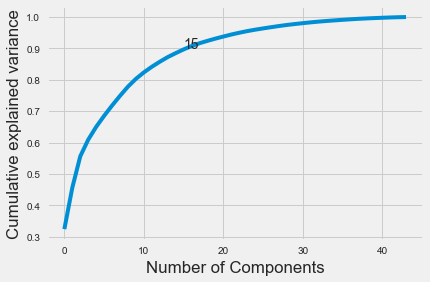

In [170]:
#plotting the relation between components and variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15', xy=(15,.90))

In [171]:
# consider first 15 components as they are explaining the 90% of variation in the data

x_pca  = PCA(n_components = 15)
spect_df_pca = x_pca.fit_transform(spect_df)
spect_test_pca = x_pca.transform(spect_test)

Text(0.5, 1.0, 'Correlation between different features')

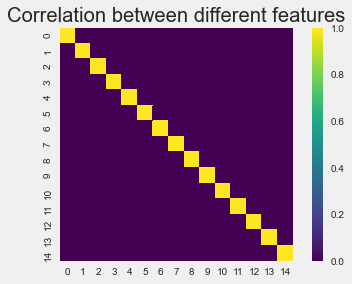

In [172]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(spect_df_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

After PCA, there is no correlation among any components.

In [173]:
#train a logistic regression model on training set

from sklearn.linear_model import LogisticRegression

# Instantiate Model

pca_logreg = LogisticRegression(class_weight = 'balanced')

start = time.time()

# fit model

pca_logreg.fit(spect_df_pca, target)

end = time.time()

training_time = end-start

print("Time required to train a Logistic Regression after PCA: ", training_time)

Time required to train a Logistic Regression after PCA:  0.002987384796142578


**Observation**

Here we observed that after PCA, the training time has reduced slightly. <br>
The original dataset had 45 features to train the model.  <br>
After PCA, we are only using 15 features which takes less time to train.

In [174]:
# make class prediction for the testing set

y_pred_class_pca  = pca_logreg.predict(spect_test_pca)

In [175]:
# calculate accuracy
print(metrics.accuracy_score(target_t, y_pred_class_pca))

0.7125


In [176]:
print (metrics.classification_report(target_t, y_pred_class_pca))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        40
           1       0.77      0.60      0.68        40

   micro avg       0.71      0.71      0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



In [177]:
print(metrics.confusion_matrix(target_t,y_pred_class_pca))

[[33  7]
 [16 24]]


### Random Forest   <a id='rf'>

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10,class_weight='balanced')#(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rf_model=rf_clf.fit(spect_df,target)
end = time.time()
training_time = end-start
print("Time required to train Random Forest Model: ", training_time)

rf_prediction = rf_model.predict(spect_test)

Time required to train Random Forest Model:  0.010969161987304688


In [179]:
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,rf_prediction))

0.5875


In [180]:
print(metrics.classification_report(target_t,y_pred_class_pca))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        40
           1       0.77      0.60      0.68        40

   micro avg       0.71      0.71      0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



In [181]:
print(metrics.confusion_matrix(target_t,y_pred_class_pca))

[[33  7]
 [16 24]]


### Applying PCA to Random Forest model   <a id='pcarf'>

In [182]:
rfClassifier=RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=12, min_samples_leaf=4, min_samples_split=10,class_weight='balanced')#(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rfClassifier.fit(spect_df_pca,target)
end = time.time()
training_time = end-start
print("Time required to train a Random Forest model after PCA is :", training_time)

Time required to train a Random Forest model after PCA is : 0.009973287582397461


**Observation**

Again we have observed that after PCA, the training time has reduced.

In [183]:
# Now test the model
# Consider first 15 components as they are explaining the 90% of variation in the data
test_pred = rfClassifier.predict(spect_test_pca)
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,test_pred))

0.675


In [184]:
print(metrics.classification_report(target_t,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        40
           1       0.61      0.95      0.75        40

   micro avg       0.68      0.68      0.68        80
   macro avg       0.75      0.68      0.65        80
weighted avg       0.75      0.68      0.65        80



In [185]:
print(metrics.confusion_matrix(target_t,test_pred))

[[16 24]
 [ 2 38]]
